<a href="https://colab.research.google.com/github/yeshwanthmudadla/research-assignment-3/blob/main/TAAUG2411_UPgrade_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing transformers


In [9]:
pip install transformers datasets scikit-learn matplotlib seaborn wordcloud

The code imports various libraries for data loading,Dataset Loading loads the AG News dataset using the datasets library,and data samoling samples 500 sampleas from test and training sets and EDA helps in identifiying common theme or topic within the topic

Training Set Size: 120000 observations
Test Set Size: 7600 observations
Training Set Sample Size: 500 observations
Test Set Sample Size: 500 observations


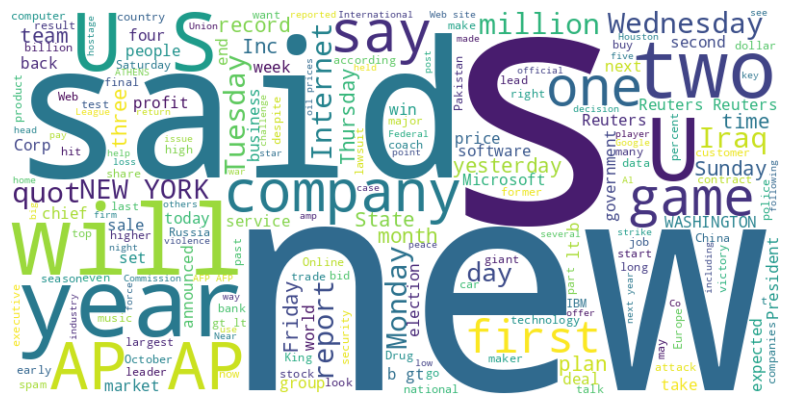

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments,DataCollatorWithPadding, EvalPrediction
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import pandas as pd
import gc

# Load the dataset
dataset = load_dataset('ag_news')

# Print the number of observations in the dataset
train_size = len(dataset['train'])
test_size = len(dataset['test'])
print(f"Training Set Size: {train_size} observations")
print(f"Test Set Size: {len(dataset['test'])} observations")

# Sample 500 observations from each set
train_sample = dataset['train'].shuffle(seed=42).select(range(500))
test_sample = dataset['test'].shuffle(seed=42).select(range(500))

# Print the size of the sampled dataset
print(f"Training Set Sample Size: {len(train_sample)} observations")
print(f"Test Set Sample Size: {len(test_sample)} observations")

# EDA - Word Cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

sample_text = train_sample['text']
generate_wordcloud(sample_text)

These imports from the transformers library are important tools for working with BERT and RoBERTa models for sequence classification tasks

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, EvalPrediction, DataCollatorWithPadding

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training BERT...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,No log,0.876952,0.792000,0.788613,0.801947,0.792000


BERT Evaluation Metrics:
{'eval_loss': 0.8769521713256836, 'eval_accuracy': 0.792, 'eval_f1': 0.78861296884878, 'eval_precision': 0.8019474138145135, 'eval_recall': 0.792, 'eval_runtime': 827.1619, 'eval_samples_per_second': 0.604, 'eval_steps_per_second': 0.151, 'epoch': 0.992}
Training RoBERTa...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,No log,1.002005,0.800000,0.797755,0.823800,0.800000


RoBERTa Evaluation Metrics:
{'eval_loss': 1.0020054578781128, 'eval_accuracy': 0.8, 'eval_f1': 0.7977548490312428, 'eval_precision': 0.823799857253316, 'eval_recall': 0.8, 'eval_runtime': 833.0533, 'eval_samples_per_second': 0.6, 'eval_steps_per_second': 0.15, 'epoch': 0.992}


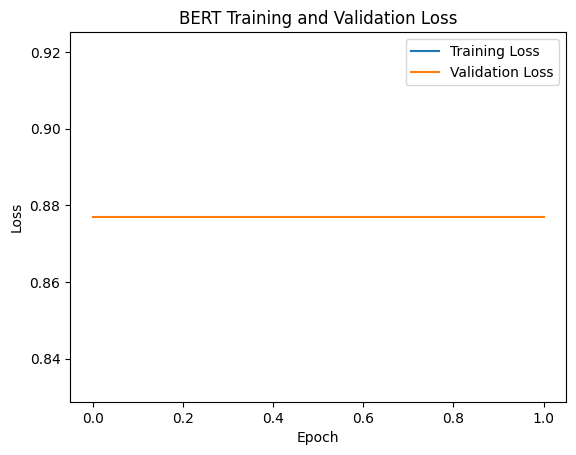

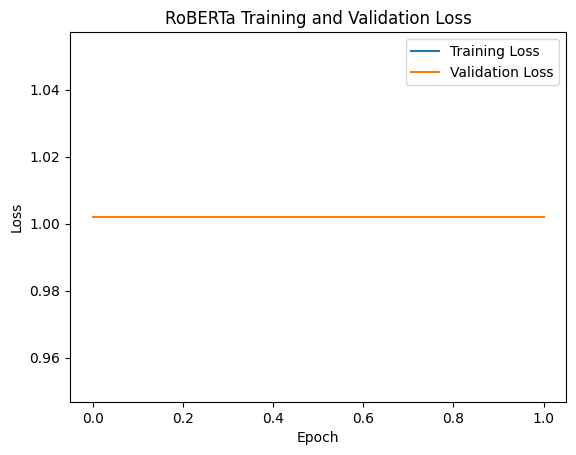


BERT Performance Metrics:
      Metric  BERT (Tuned)  BERT (Untuned)
0   Accuracy      0.792000        0.242000
1  Precision      0.801947        0.147866
2     Recall      0.792000        0.242000
3   F1 Score      0.788613        0.101615

RoBERTa Performance Metrics:
      Metric  RoBERTa (Tuned)  RoBERTa (Untuned)
0   Accuracy         0.800000           0.240000
1  Precision         0.823800           0.057600
2     Recall         0.800000           0.240000
3   F1 Score         0.797755           0.092903


In [ ]:
# Tokenizers for BERT and RoBERTa
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples, tokenizer):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

# Tokenize datasets
bert_tokenized_datasets = train_sample.map(lambda x: tokenize_function(x, bert_tokenizer), batched=True)
bert_tokenized_datasets = bert_tokenized_datasets.rename_column('label', 'labels')
roberta_tokenized_datasets = train_sample.map(lambda x: tokenize_function(x, roberta_tokenizer), batched=True)
roberta_tokenized_datasets = roberta_tokenized_datasets.rename_column('label', 'labels')

# Ensure dataset has the necessary fields
data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

# Load models
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)

# Training Arguments with reduced batch size and gradient accumulation
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,  # Further reduced batch size
    per_device_eval_batch_size=4,   # Further reduced batch size
    num_train_epochs=1,             # Reduced epochs for quicker execution
    weight_decay=0.01,
    gradient_accumulation_steps=2,  # Gradient accumulation
)

# Compute metrics for evaluation
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Trainer for BERT
bert_trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=bert_tokenized_datasets,
    eval_dataset=test_sample.map(lambda x: tokenize_function(x, bert_tokenizer), batched=True).rename_column('label', 'labels'),
    tokenizer=bert_tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

# Trainer for RoBERTa
roberta_trainer = Trainer(
    model=roberta_model,
    args=training_args,
    train_dataset=roberta_tokenized_datasets,
    eval_dataset=test_sample.map(lambda x: tokenize_function(x, roberta_tokenizer), batched=True).rename_column('label', 'labels'),
    tokenizer=roberta_tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

# Evaluate the models before any fine-tuning (Untuned Metrics)
bert_untuned_eval_results = bert_trainer.evaluate()
roberta_untuned_eval_results = roberta_trainer.evaluate()

# Train and Evaluate BERT (Tuned Metrics)
print("Training BERT...")
bert_trainer.train()
bert_tuned_eval_results = bert_trainer.evaluate()
print("BERT Evaluation Metrics:")
print(bert_tuned_eval_results)

# Train and Evaluate RoBERTa (Tuned Metrics)
print("Training RoBERTa...")
roberta_trainer.train()
roberta_tuned_eval_results = roberta_trainer.evaluate()
print("RoBERTa Evaluation Metrics:")
print(roberta_tuned_eval_results)

# Visualize training metrics for both models
def plot_metrics(trainer, title):
    metrics = trainer.state.log_history
    train_loss = [x['loss'] for x in metrics if 'loss' in x]
    eval_loss = [x['eval_loss'] for x in metrics if 'eval_loss' in x]
    plt.plot(train_loss, label='Training Loss')
    plt.plot(eval_loss, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot BERT Metrics before deleting the trainer
plot_metrics(bert_trainer, 'BERT Training and Validation Loss')

# Free up memory
del bert_trainer
gc.collect()

# Plot RoBERTa Metrics before deleting the trainer
plot_metrics(roberta_trainer, 'RoBERTa Training and Validation Loss')

# Free up memory
del roberta_trainer
gc.collect()

# Print the performance metrics in a table format
def print_metrics_table(tuned_metrics, untuned_metrics, model_name):
    metrics_table = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        f'{model_name} (Tuned)': [
            tuned_metrics['eval_accuracy'],
            tuned_metrics['eval_precision'],
            tuned_metrics['eval_recall'],
            tuned_metrics['eval_f1']
        ],
        f'{model_name} (Untuned)': [
            untuned_metrics['eval_accuracy'],
            untuned_metrics['eval_precision'],
            untuned_metrics['eval_recall'],
            untuned_metrics['eval_f1']
        ]
    })
    print(f"\n{model_name} Performance Metrics:")
    print(metrics_table)

# Print metrics for BERT
print_metrics_table(bert_tuned_eval_results, bert_untuned_eval_results, 'BERT')

# Print metrics for RoBERTa
print_metrics_table(roberta_tuned_eval_results, roberta_untuned_eval_results, 'RoBERTa')
